# Real Estate - advanced estimator

In the the previous challenge we saw that if we have more flats than feature in our dataset. Thus we can't "solve the equation" $X\theta = Y$ to find a deterministic formula for $\theta$ and thus predict flat price this way.

In this exercise we now have access to a bigger dataset consisting of 1000 flats and we want to refine our prediction for the same new flat as before

- `Surface`: 3000 $ft^2$
- `Bedrooms`: 5 
- `Floors`: 1

Instead of solving $X\theta = Y$ with a matrix $X$ of shape (1000,4) non-inversible, we will find the $\hat{\theta}$ that minimizes the error $e = X\hat{\theta} - Y $: This approach is called a **linear regression model**. We will measure this error $e$ using the euclidian distance $\left\|e\right\|$ using the Mean Square Error.

Let's compute $\hat{\theta}$ to find an approximate estimation of the new flat's price.


In [12]:
# import default libraries
# You can now use pandas again to manipulate the data table easily
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Explore data

In [10]:
# Load the dataset `flats.csv` located in the notebook's folder into a pandas DataFrame named "flats"
flats_df = pd.read_csv('flats.csv')
flats_df.head()

,price,bedrooms,surface,floors
0,274.0,3,1830,2.0
1,500.0,4,2120,1.0
2,320.0,3,1260,1.0
3,445.5,3,1880,1.0
4,637.5,3,1680,1.0


Use scatterplots to visually figure out which feature gives the most information about prices?

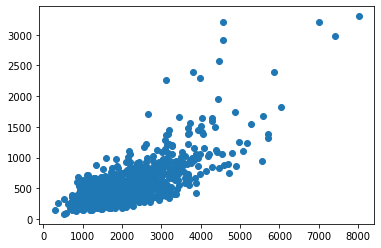

In [11]:
# Your plots here
plt.scatter(flats_df["surface"], flats_df["price"])

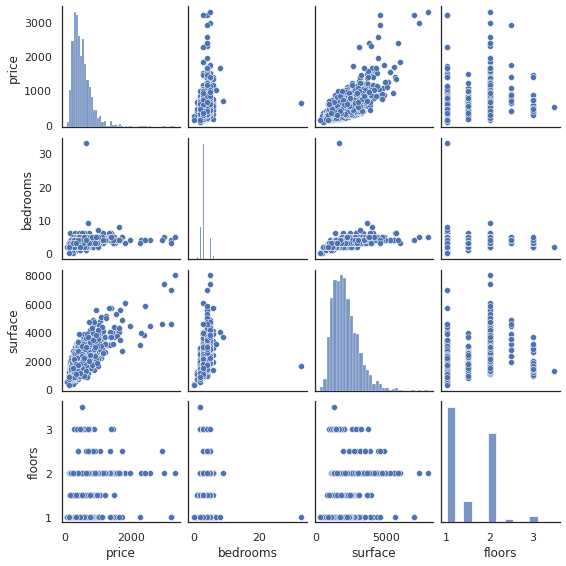

In [13]:
sns.set(style='white')
sns.pairplot(flats_df, height=2)
plt.show()

It seems that `surface` is a stronger indicator of price than the number of bedrooms or floors. In statistics, we say that `prices` are more **correlated** with `surface` than with other features. 

Let's double check this by running [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) below, which computes correlation coefficients between each pair of columns of a DataFrame. 1 means perfectly correlated, while 0 means not correlated at all.

In [14]:
pd.DataFrame.corr(flats_df)

,price,bedrooms,surface,floors
price,1.000000,0.239623,0.732790,0.258263
bedrooms,0.239623,1.000000,0.417170,0.131993
surface,0.732790,0.417170,1.000000,0.357512
floors,0.258263,0.131993,0.357512,1.000000


## 2 Estimator with 1-feature

Let's try to build a statistical estimator of `price` only as a function of `surface`.

Let's try to fit a **linear regression** between the two variables. Concretely speaking, we want to choose the best parameters $\hat{\theta}$ = (`slope`, `intercept`) such that the `slope * surface + intercept` is as close as possible to the `price` in terms of Mean Square Error.

👉During the next weeks we will learn different models (Linear Regression, KNN, Logistic Regression, Neural Networks,…). An important part of your job is choosing the right model and optimizing the parameters to make the best predictions.

### 2.1 Visual approach

Implement the function `plot_line(slope, intercept, ax)` that plots a line with the slope and intercept arguments on the ax figure. We added the argument ax, so you can plot the line(s) on your scatterplot.
When you are done play with different values for slope and intercept in order to get a “good linear approximation” of the data. Can you find the best fit?

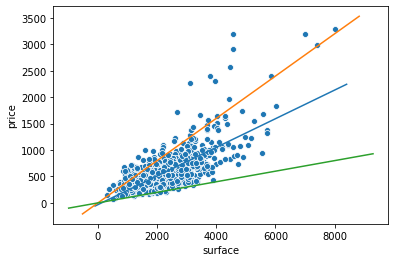

Not so easy (and not very “scientific”), right?

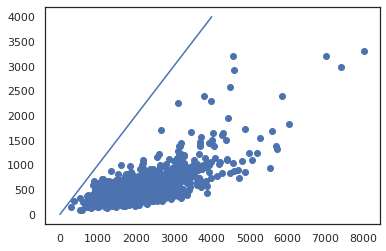

In [19]:
plt.scatter(flats_df["surface"], flats_df["price"])
b = [0,0]
a = 1
plt.plot([b[0], 4000],[b[1], a*4000+b[1]])

In [48]:
def plot_line(a, b, ax):
    """Plot a line from slope and intercept on the ax""" 
    ax.plot([b[0], 8000],[b[1], a*8000+b[1]], color = "red")
    pass

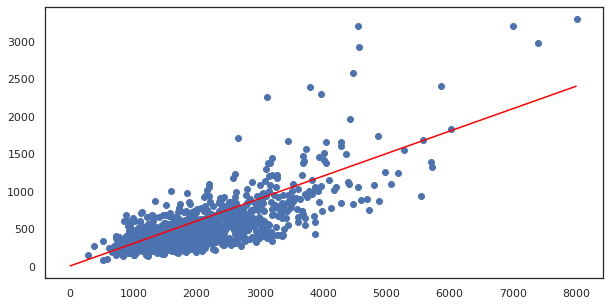

In [49]:
# TO DO: play with slopes and intercepts to get the best fit
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5)) 
axs.scatter(flats_df["surface"], flats_df["price"])
plot_line(0.3,[0,0],axs)

### 2.2 Computational approach

To be sure that our estimator line is the best possible one, we need to compute  the **Mean Squared Error** between `price` and `predicted_price (slope * surface + intercept)`. Remember those are vectors of shape (1000,1).

**Step1:** for each row (ie. flat), we should evaluate the squared_error (predicted_price - price)**2

In [91]:
slope = 0.3
intercept = 0
# error_array = np.empty((1,1))
# len(flats_df[''])
# for index, row in flats_df.head().iterrows():
#         predicted_price = slope * row['surface']+ intercept
#         error = row["price"] - predicted_price
#         error_array = np.append(error_array, [error*error])
# error_array
test = (flats_df.loc[:,'price'] - slope * flats_df.loc[:,'surface'] + intercept)**2
test


0      11464996.00
1      13987600.00
2       4840000.00
3      10985910.25
4       7412006.25
          ...     
995    44355600.00
996     7750656.00
997     3062500.00
998    28206721.00
999     2325625.00
Length: 1000, dtype: float64

In [95]:
def squared_errors(slope, intercept, surfaces, prices):
    """TO DO: return an array containing the squared errors between 
    all predicted_prices and the actual prices (from the dataset)
    """
    return (prices - slope * surfaces + intercept)**2
squared_errors(0.3, 0, flats_df.loc[:,'surface'] , flats_df.loc[:,'price'])

0       75625.00
1       18496.00
2        3364.00
3       14042.25
4       17822.25
         ...    
995    163216.00
996     34744.96
997      1225.00
998     60025.00
999     12996.00
Length: 1000, dtype: float64

**Step2:** Return the mean of the array returned from squared_errors.

In [83]:
def mse(slope, intercept, surfaces, prices):
    '''TO DO: Return the mean of the array returned from squared_errors.'''
    return squared_errors(slope, intercept, surfaces, prices).mean()

In [106]:
mse(0.27, 10, flats_df.loc[:,'surface'] , flats_df.loc[:,'price'])


58767.140959407

### 2.3 Finding the best parameters

Play with different values for `slope` and `intercept` and try to get the best fit by hand!  
Notice how hard it is to optimize both parameters at the same time.
Follow the step below to get an idea of one potential approach:

#### Step ①: Start by fixing `intercept` to your best guess value, then find an approximated min slope for `mse=f(slope)`

In [141]:
# For instance, we may suppose there is always a small transaction even for very small flats?
intercept_initial_guess = 10

# Create a range of 100 slopes which contains what you believe is the optimal slope (hint: np.linspace())
slope_range = np.linspace(0,1,100)

# Create the list of MSEs for each slope value
mse_list = [mse(slope, 10, flats_df.loc[:,'surface'] , flats_df.loc[:,'price']) for slope in slope_range] 


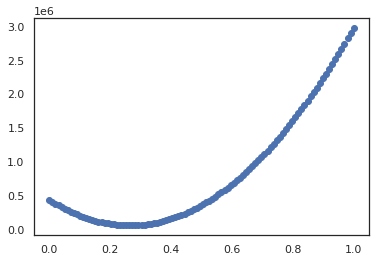

In [142]:
# Plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!
plt.scatter(slope_range, mse_list)

In [143]:
# Compute the min value of MSEs for your intercept_initial_guess, and the corresponding `slope_best` value
# Hint: see you can use python's built-in `min()` function, as well as `List.index()` method
mse_list[mse_list.index(np.min(mse_list))]
slope_range[mse_list.index(np.min(mse_list))]

0.26262626262626265

#### Step ②: Let's now fix the slope to that `slope_best` value, then re-use the previous approach to find `a` then find `best_intercept` approx.

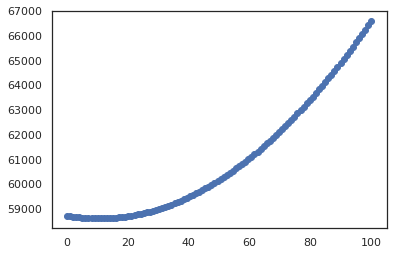

In [160]:
# Create a range of 100 intercepts which contains what you believe is the optimal intercept
ipt_range = np.linspace(0,100,100)
slope_best = 0.263

# Create the list of MSEs for each intercept value
mse_list = [mse(slope_best, ipt, flats_df.loc[:,'surface'] , flats_df.loc[:,'price']) for ipt in ipt_range] 
# Plot MSEs against intercepts. Do you see a minimum? If not, try another range of slopes!
plt.scatter(ipt_range, mse_list)

In [161]:
# Compute the min value of MSEs for slope=slope_best and store the corresponding best intercept

mse_list[mse_list.index(np.min(mse_list))]
ipt_range[mse_list.index(np.min(mse_list))]
#best ipt = 11.11, best slope = 0,263

11.111111111111112

**Great job**! By adding a non-zero intercept parameter, we have been able to reduce the MSE even more (Feel free to plot the 
regression line in your scatter plot to "visually" confirm the approximate fit).

❓ However, what guarantees you that these (`intercept_best`, `slope_best`) parameters are really the best ones? 

<details>
    <summary>🔥 Explanations </summary>
    
We could maybe find an even better slope value by repeating step ①, this time fixing intercept at `intercept_best`! And then repeat step ② with the new slope to adjust the intercept again...
    
In order to find the global minimum of a 2-parameter function RMSE = f(slope, intercept), we may have to repeat step ① and ② indefinitely until values converge towards absolute minimums - and with no guarantee of success.
    
<img src='https://raw.githubusercontent.com/lewagon/data-images/master/decision-science/real-estate-minimizer.png'>
    
💪 You just discovered one of the fondamental aspects of machine learning: **iterative process for finding mimina**.  

👉 As you can guess, in the Data Scientist World, algorithms have been developped to automate and optimize such processes. In the next few weeks, you will discover the power of other algorithms such as **Gradient Descent**, and python libaries such as `Stastmodels` that does this iterative process for you. 

</details>



❓Run the cells below if you are curious and want to find the absolute best slope and intercept for this dataset, computed using gradient descent.

<AxesSubplot:xlabel='surface', ylabel='price'>

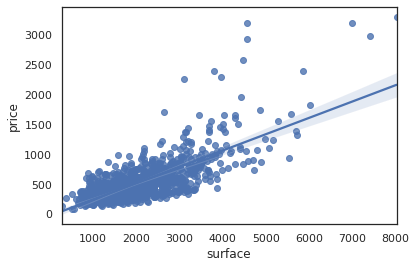

In [164]:
# Try this out (seaborn, visual solution)
sns.regplot(data=flats_df, x='surface', y='price')

In [167]:
# Try this out (statsmodels, exact solution)!
import statsmodels.formula.api as smf
regression = smf.ols(formula= 'price ~ surface', data=flats_df).fit()
regression.params

Intercept   -33.308336
surface       0.273690
dtype: float64

Let's get back to our initial question: What is your new prediction for the 5th flat below? How does it compare with your initial prediction only based on 4 flats? 

- `surface`: 3000 $ft^2$
- `bedrooms`: 5 
- `floors`: 1

In [168]:
# compute predicted price (Remember that the real price is 750,000$)
print('predicted price: ', regression.params['surface']*3000 + regression.params['Intercept'])

predicted price:  787.7629605753169


It's better than our initial deterministic estimator based on only 4 flats, but obviously we miss the information provided by the number of bedrooms and floors in this prediction

## 3 Estimator with all features (surface, bedrooms, floors)?

Linear regression with three features works the same way as with one feature, but instead of determining only the (`intercept` and `slope`) parameters to minimizes RMSE, we'll need to find 4 parameters: $\hat{\theta}$ = (`intecept`, `slope_surface`, `slope_bedrooms`, `slope_floors`). 

The same gradient iterative method is applicable, and you will code it yourself by hand during the next few weeks.
Meanwhile, feel free to run the cell below to see the final result of this multivariate regression:

In [172]:
# Find the four regression coefficient by running this cell
import statsmodels.formula.api as smf
regression = smf.ols(formula= 'price ~ surface + bedrooms + floors', data=flats_df).fit()
regression.params

Intercept    18.154854
surface       0.286953
bedrooms    -21.623564
floors       -3.811868
dtype: float64

In [173]:
# Compute the newly predicted price for the 5th flat? Is this prediction better ?
regression.params['Intercept'] +\
regression.params['surface']*3000 +\
regression.params['bedrooms']*5 +\
regression.params['floors']*1

767.085107310286

<details>
    <summary><bold>🔎 Concluding remarks (linear algebra)</bold> </summary>


This optimisation problem can be summarized as follows: We need to find a vector of parameters $\hat{\theta}$ (slope + intercept) that minimizes an error $e = \left\|X\hat{\theta} - Y \right\|^2$, for a given matrix of features $X$ (surfaces, floors, bedrooms) and a vector of observations $Y$ (prices)

Such minimum $\hat{\theta}$ is reached when the "derivatives" of $e$, that is $2 X^T(X\hat{\theta}−Y)$ equals zero (proof next week). In other words, we need to solve the linear system $(X^TX)\hat{\theta}=X^TY$. It has has a unique solution provided no column of X can be expressed as a linear combination of the others: in that case $(X^TX)^{-1}$ is invertible and the minum is reached when $\hat{\theta} = (X^TX)^{-1} X^T Y$. Notice how X does not need to be squared anymore compared to the first challenge.

Keep in mind, however, that inverting matrices is **computationally complex**. That is why other methods have been developed to find the minimum, such as the gradient descent. Read more on [stack overflow](https://stats.stackexchange.com/a/278779) if you are interested!
</details>


🏁 Congratulation! Don't forget to commit and push your notebook!